# Trader Performance vs Market Sentiment Analysis
## Candidate: Bahurdeen U

### Objective
In this analysis, I examine how Bitcoin market sentiment (Fear vs Greed)
relates to trader behavior and performance.

I analyze:
- Profitability differences (Closed PnL)
- Trade size behavior (Size USD)
- Trade frequency
- Long/Short bias
- Trader segmentation

The goal is to derive actionable insights that inform smarter trading strategies.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [91]:
from google.colab import files
uploaded = files.upload()

Saving fear_greed_index.csv to fear_greed_index (3).csv


In [93]:
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data (1).csv


In [101]:
sentiment = pd.read_csv("fear_greed_index (3).csv")
trader = pd.read_csv("historical_data (1).csv")

print("Sentiment Shape:", sentiment.shape)
print("Trader Shape:", trader.shape)


Sentiment Shape: (2644, 4)
Trader Shape: (211224, 16)


## Data Inspection

I inspect the datasets for structure, missing values, and duplicates.


In [102]:
trader.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [103]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [104]:
print("Trader Missing Values:\n", trader.isnull().sum())
print("\nSentiment Missing Values:\n", sentiment.isnull().sum())

print("\nTrader Duplicates:", trader.duplicated().sum())


Trader Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trader Duplicates: 0


In [105]:
df.columns = df.columns.str.strip()


## Timestamp Conversion & Dataset Alignment

I convert timestamps to datetime format and align both datasets at daily level.


In [106]:
trader['Timestamp IST'] = pd.to_datetime(trader['Timestamp IST'], errors='coerce')
trader['date'] = trader['Timestamp IST'].dt.date
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['date'] = sentiment['date'].dt.date
df = trader.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)
df.head()




,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,Greed


In [107]:
df['classification'].value_counts()


,count
classification,
Fear,13869
Greed,11292
Extreme Greed,5621
Neutral,2756
Extreme Fear,2326


# Part A — Key Metrics Creation
I create performance and behavioral metrics required for analysis.


In [108]:
daily_pnl = df.groupby(['date','Account'])['Closed PnL'].sum().reset_index()
daily_pnl.head()


,date,Account,Closed PnL
0,2023-01-05,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-05-12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2024-01-01,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-129.531460
3,2024-01-02,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
4,2024-01-03,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,8244.241409


In [109]:
df['win'] = df['Closed PnL'] > 0

win_rate = df.groupby('Account')['win'].mean().reset_index()
win_rate.rename(columns={'win':'win_rate'}, inplace=True)

win_rate.head()


,Account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [110]:
avg_trade_size = df.groupby('Account')['Size USD'].mean().reset_index()
avg_trade_size.rename(columns={'Size USD':'avg_trade_size'}, inplace=True)

avg_trade_size.head()


,Account,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


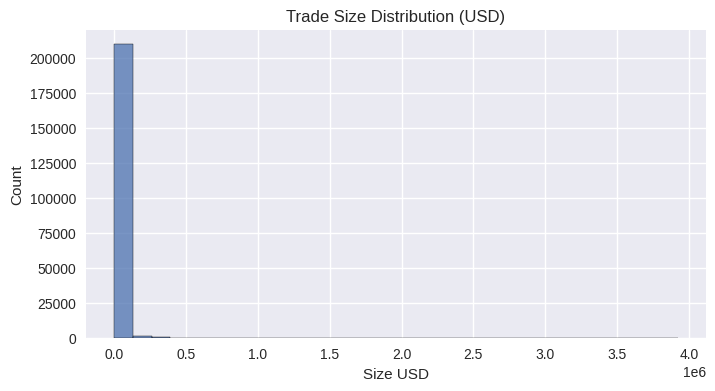

In [111]:
df['Size USD'].describe()

plt.figure(figsize=(8,4))
sns.histplot(df['Size USD'], bins=30)
plt.title("Trade Size Distribution (USD)")
plt.show()


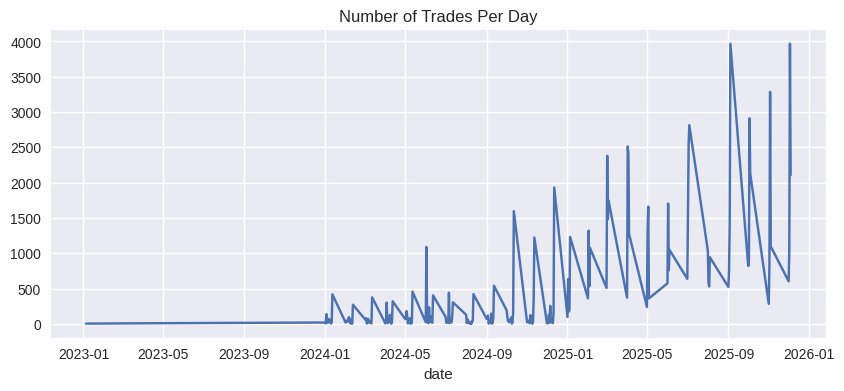

In [112]:
trades_per_day = df.groupby('date').size()

plt.figure(figsize=(10,4))
trades_per_day.plot()
plt.title("Number of Trades Per Day")
plt.show()


/tmp/ipython-input-1028239566.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  long_short_monthly = long_short.resample('M').sum()


<Figure size 1500x600 with 0 Axes>

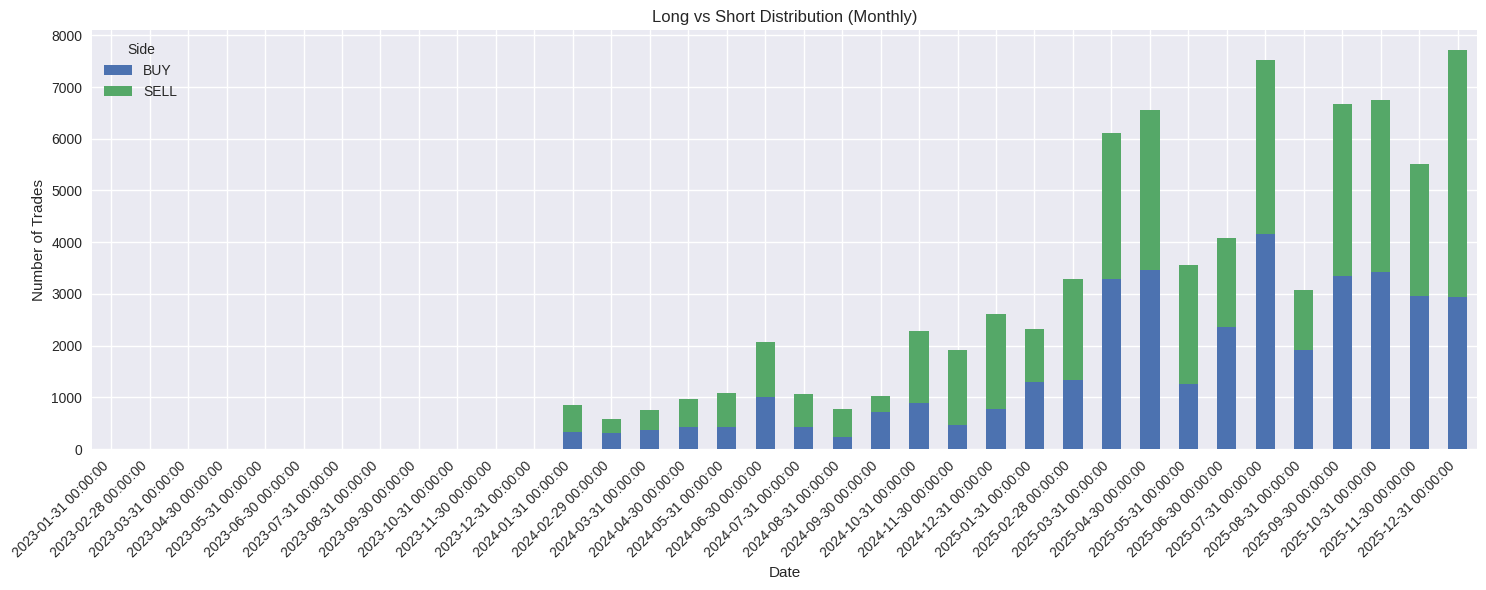

In [124]:
long_short = df.groupby(['date','Side']).size().unstack()

long_short.index = pd.to_datetime(long_short.index)

long_short_monthly = long_short.resample('M').sum()

plt.figure(figsize=(15,6))
long_short_monthly.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title("Long vs Short Distribution (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Part B — Sentiment-Based Analysis

I compare trader performance and behavior across Fear and Greed days.


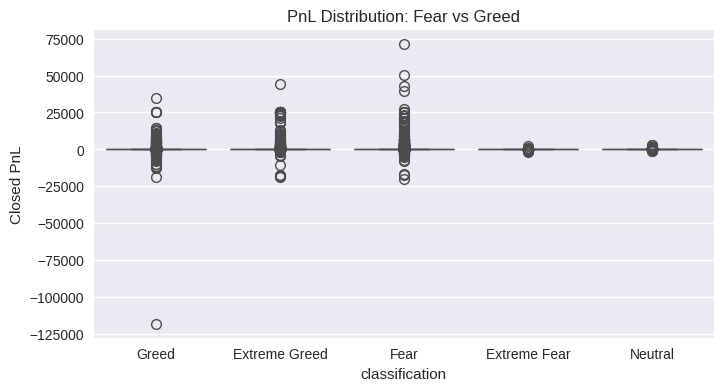

In [114]:
df.groupby('classification')['Closed PnL'].mean()

plt.figure(figsize=(8,4))
sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()


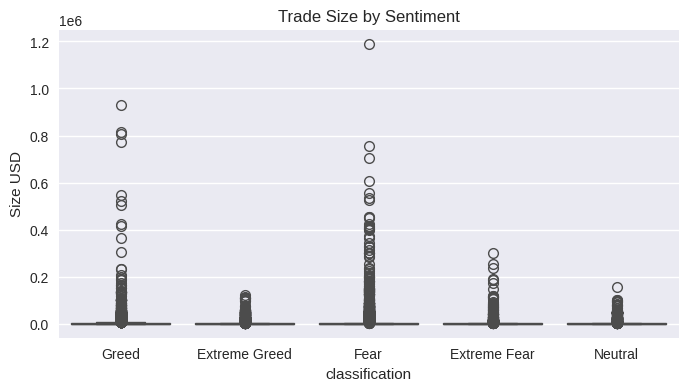

In [115]:
df.groupby('classification')['Size USD'].mean()

plt.figure(figsize=(8,4))
sns.boxplot(x='classification', y='Size USD', data=df)
plt.title("Trade Size by Sentiment")
plt.show()


In [116]:
df.groupby('classification').size()


,0
classification,
Extreme Fear,2326
Extreme Greed,5621
Fear,13869
Greed,11292
Neutral,2756


## Sentiment-Level Summary Metrics

To understand how trader behavior varies across sentiment regimes,
I compute average profitability, average trade size,
and total trade count by sentiment.


In [117]:
# Average profitability by sentiment
df.groupby('classification')['Closed PnL'].mean()


,Closed PnL
classification,
Extreme Fear,1.891632
Extreme Greed,205.816345
Fear,128.287950
Greed,53.988003
Neutral,27.088803


In [118]:
# Average trade size by sentiment
df.groupby('classification')['Size USD'].mean()


,Size USD
classification,
Extreme Fear,4118.761840
Extreme Greed,3242.085086
Fear,5744.782685
Greed,5051.878829
Neutral,4332.202906


In [119]:
# Trade frequency by sentiment
df.groupby('classification').size()


,0
classification,
Extreme Fear,2326
Extreme Greed,5621
Fear,13869
Greed,11292
Neutral,2756


## Trader Segmentation
I segment traders based on trade size and consistency.


In [120]:
median_size = df['Size USD'].median()

df['size_segment'] = np.where(
    df['Size USD'] > median_size,
    "Large Trades",
    "Small Trades"
)

df.groupby(['classification','size_segment'])['Closed PnL'].mean()


classification  size_segment
Extreme Fear    Large Trades      2.558267
                Small Trades      1.222700
Extreme Greed   Large Trades    476.756731
                Small Trades     22.007281
Fear            Large Trades    232.573625
                Small Trades      5.376323
Greed           Large Trades     97.854303
                Small Trades      6.614985
Neutral         Large Trades     58.886549
                Small Trades      4.522661
Name: Closed PnL, dtype: float64

In [121]:
trade_counts = df.groupby('Account').size().reset_index(name='trade_count')

median_trades = trade_counts['trade_count'].median()

trade_counts['frequency_segment'] = np.where(
    trade_counts['trade_count'] > median_trades,
    "Frequent",
    "Infrequent"
)

trade_counts.head()


,Account,trade_count,frequency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,Frequent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,Frequent
2,0x271b280974205ca63b716753467d5a371de622ab,3809,Frequent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311,Frequent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239,Infrequent


In [122]:
win_segment = df.groupby('Account')['win'].mean().reset_index()

win_segment['consistency'] = np.where(
    win_segment['win'] > 0.6,
    "Consistent Winner",
    "Inconsistent"
)

win_segment.head()


,Account,win,consistency
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612,Inconsistent
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720,Inconsistent
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917,Inconsistent
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585,Inconsistent
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914,Inconsistent


# Part C — Actionable Strategy Recommendations

## Key Insights

1. Trader profitability is highest during Extreme Greed periods
   (average PnL ≈ 205), indicating strong momentum-driven gains.

2. Fear periods generate higher average PnL (≈128) than normal Greed periods (≈54),
   suggesting potential mean-reversion or volatility-driven opportunities.

3. Average trade size is highest during Fear days (≈5744 USD),
   indicating increased risk-taking during uncertain market conditions.

4. Trade activity is also higher during Fear compared to Greed,
   implying elevated market participation under stress conditions.

---

## Strategy Rule 1 — Aggressive Momentum Strategy During Extreme Greed

During Extreme Greed periods:
- Allow larger position sizing for high-confidence trades.
- Focus on trend-following strategies.
- Implement trailing stop-loss mechanisms to protect gains.

Rationale:
Extreme Greed regimes show the highest average profitability,
indicating strong momentum opportunities.

---

## Strategy Rule 2 — Controlled Volatility Strategy During Fear

During Fear periods:
- Maintain position sizes but introduce stricter risk controls.
- Reduce overtrading despite high market activity.
- Use volatility-adjusted position sizing.

Rationale:
Although Fear days produce strong average PnL,
they also involve larger position sizes and higher activity,
which increases drawdown risk.


# Executive Summary

This analysis demonstrates that market sentiment significantly influences
trader profitability, trade size behavior, and activity levels.

Extreme Greed periods show the highest average profitability,
while Fear periods exhibit larger position sizing and higher trading activity.

These findings suggest that sentiment-aware position sizing
and risk controls can enhance trading performance and reduce drawdown risk.
